# Credit Card Fraud Regression Logistic by Kaoutar Bidah

In [4]:
#import laibrairises
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

In [7]:
# look at the data
df = pd.read_csv("creditcardFraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# lots more non-fraud

df0 = df.loc[df["Class"] == 0]
df1 = df.loc[df["Class"] == 1]
nFraud = len(df1)
nNotFraud = len(df0)
n = len(df)

print("Number of Fraudulent Observations:", nFraud)
print("Number of Non-Fraudulent Observations:", nNotFraud)
print("Proportion of Fraudulent Observations:", nFraud / n)
print("Proportion of Non-Fraudulent Observations:", nNotFraud / n)

Number of Fraudulent Observations: 492
Number of Non-Fraudulent Observations: 284315
Proportion of Fraudulent Observations: 0.001727485630620034
Proportion of Non-Fraudulent Observations: 0.9982725143693799


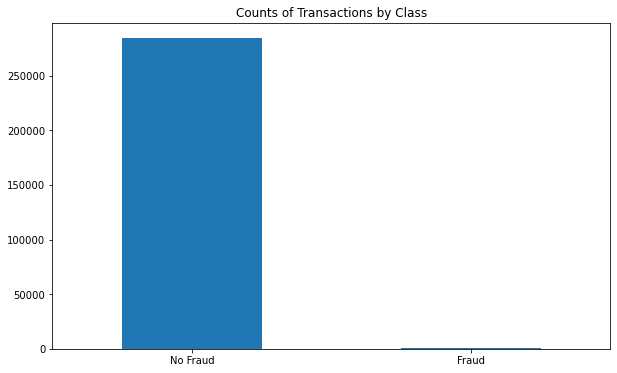

In [10]:
# visual of how much more non fraud there are

fig, ax = plt.subplots(figsize = (10, 6))
df["Class"].value_counts().plot(ax = ax, kind = "bar")
plt.xticks(np.arange(2), ("No Fraud", "Fraud"), rotation = 0)
plt.title("Counts of Transactions by Class")
plt.show()

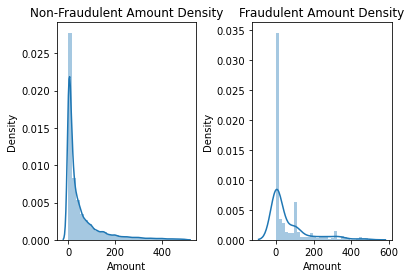

In [11]:
# Check distributions of Amount and how they differ between class 0 and 1

fig, axs = plt.subplots(1, 2)
plt.subplots_adjust(wspace = 0.4)
sns.distplot(df0["Amount"][df0["Amount"] < 500], bins = 30, ax = axs[0])
sns.distplot(df1["Amount"][df1["Amount"] < 500], bins = 30, ax = axs[1])
axs[0].set_title("Non-Fraudulent Amount Density")
axs[1].set_title("Fraudulent Amount Density")
plt.show()

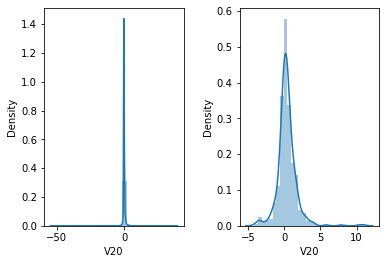

In [12]:
# Check distributions of other variables and how they differ between class 0 and 1
fig, axs = plt.subplots(1, 2)
plt.subplots_adjust(wspace = 0.4)
sns.distplot(df0["V20"], bins = 30, ax = axs[0])
sns.distplot(df1["V20"], bins = 30, ax = axs[1])
plt.show()

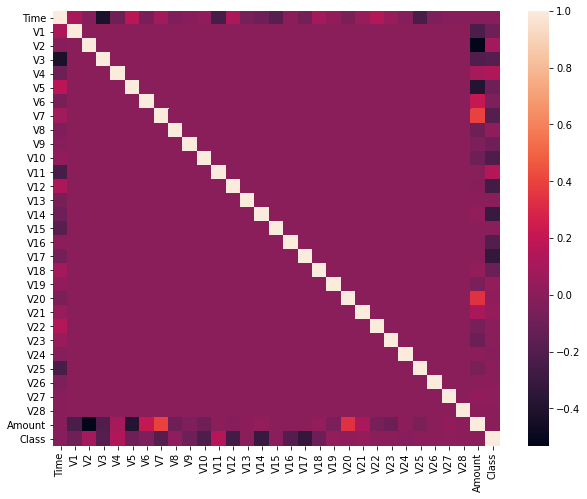

In [13]:
# Check correlations of variables
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(df.corr(), annot = False)
plt.show()

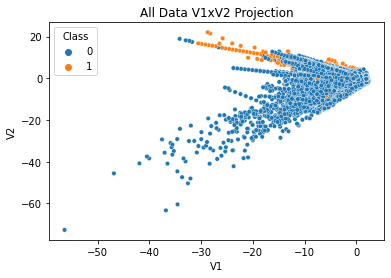

In [14]:
# plot the first two PCs against each other
fig, ax = plt.subplots()
ax = sns.scatterplot(x = "V1", y = "V2", hue = "Class",
                     data = df, s = 20)
plt.title("All Data V1xV2 Projection")
plt.show()

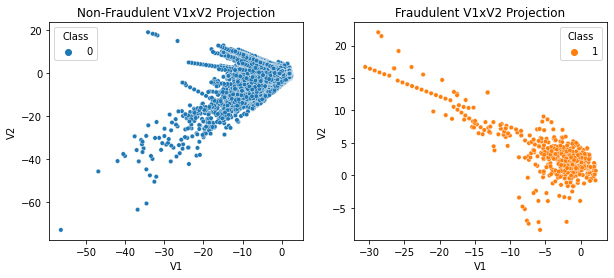

In [15]:
# plot the first two PCs against each other, separated

fig, axs = plt.subplots(1, 2, figsize = (10, 4))
sns.scatterplot(x = "V1", y = "V2", hue = "Class",
                     data = df0, s = 20, ax = axs[0])
sns.scatterplot(x = "V1", y = "V2", hue = "Class",
                     data = df1, s = 20, ax = axs[1], palette = ["tab:orange"])
axs[0].set_title("Non-Fraudulent V1xV2 Projection")
axs[1].set_title("Fraudulent V1xV2 Projection")
plt.show()

### Training and Testing Data Sets

In [16]:
# separate variables from response (classes)
X = df.iloc[:, 0:30]
y = df["Class"]

In [17]:
# Split the sample for a validation test set
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.33, random_state = 1)

In [18]:
# Base fraud rate (proportion of fraud from the training data)
base_rate = np.mean(y_train)
base_rate

0.001802746043391678

### Logistic Regression Model using all variables

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 1e9) # basically no penalization
log_reg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0)

In [20]:
y_test_pred = log_reg.predict(X_test)
y_test_pred_proba = log_reg.predict_proba(X_test)[:, 1]

In [21]:
# intercept in model
log_reg.intercept_

array([-1.01116984])

In [22]:
# 30 coefficients for 30 variables
log_reg.coef_

array([[-9.80490442e-05,  4.18162188e-01, -5.69646260e-01,
        -6.16801921e-01,  1.26690364e-01,  7.82856628e-02,
        -8.26133755e-02,  1.13601311e-01, -1.53193839e-01,
        -4.96837697e-01, -3.32899331e-01, -9.39252468e-02,
        -9.31998661e-02, -3.32303370e-01, -8.96040825e-01,
        -2.33556308e-01, -3.98631814e-01, -7.31820800e-01,
        -1.07346242e-01,  8.60213493e-02,  4.43904725e-02,
         1.98237769e-01,  2.18187769e-01,  1.77602027e-02,
        -1.94330441e-02, -1.77416537e-01,  3.47849235e-02,
        -4.43074374e-02,  4.96306406e-02, -5.22215868e-03]])

In [23]:
def logit_pvalue(model, x):
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

#### Evaluation Metrics

In [25]:
# Classification rate
logistic_misclass_rate = np.mean(y_test_pred != y_test)
logistic_misclass_rate

0.0009788587783416856

In [26]:
np.mean(y_test != 0)

0.0015746858608105376

In [27]:
# Using the logistic model, find the 1000 transactions in the test set that are most likely to be fraud
# These are the 1000 observations from the test set with the highest predicted probability of Y = 1

test_prob = log_reg.predict_proba(X_test)[:, 1]
top1000_id = np.argsort(test_prob)[::-1][:1000]
logistic_success_in_top_1000 = np.mean(np.array(y_test)[top1000_id])
logistic_success_in_top_1000

0.101

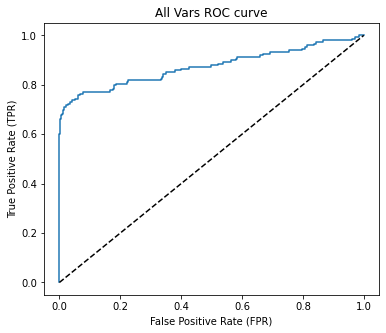

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, test_prob)
fig, ax = plt.subplots(figsize = (6,5))
ax.plot(fpr, tpr)
ax.plot([0,1],[0,1],"k--")
ax.set(xlabel = "False Positive Rate (FPR)", ylabel = "True Positive Rate (TPR)", title = "All Vars ROC curve")
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, test_prob)

0.8734253147210446

In [32]:
def logit(p):
    return(np.log(p/(1 - p)))

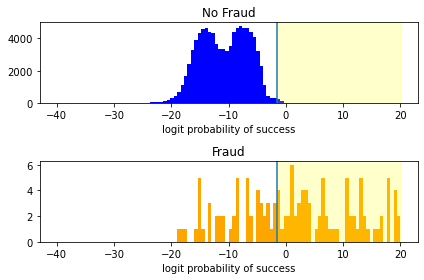

In [38]:
x_range = [-40, 20]
colors = ["blue","orange"]
titles = ["No Fraud", "Fraud"]
fig, axs = plt.subplots(nrows = 2)
for i, ax in enumerate(axs):
    ax.hist(test_prob_logit[y_test == i],
        bins = 100,
        range = x_range,
        color = colors[i])
    ax.set(title = titles[i],
        xlabel = "logit probability of success")
    ax.axvline(-1.5)
    ax.axvspan(-1.5,x_range[1], alpha=0.2, color='yellow')
fig.tight_layout()

In [41]:
# 31 pvalues for variables and intercept

logit_pvalue(log_reg, X_train)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.27240809e-04, 8.66027526e-02, 3.61151976e-02,
       6.68054989e-02, 1.94199809e-02, 0.00000000e+00, 1.04758842e-07,
       3.17830880e-02, 3.57517815e-02, 1.15463195e-14, 0.00000000e+00,
       1.44636240e-05, 3.55271368e-15, 0.00000000e+00, 4.27450830e-02,
       1.46466114e-01, 6.58492515e-01, 3.68173472e-02, 6.46789201e-03,
       8.27048281e-01, 7.72800302e-01, 1.08458890e-01, 7.03576185e-01,
       7.09293097e-01, 6.17640631e-01, 2.38031816e-13])

### Logistic Regression Model after Variable Selection

In [42]:
# Performing model selection based on p values

pvalues = logit_pvalue(log_reg, X_train)[1:]

In [43]:
# 18 variables were selected

sigIndices = np.where(pvalues < 0.05)
len(sigIndices[0])

20

In [44]:
X_trainS = X_train.iloc[:, list(sigIndices[0])]
X_testS = X_test.iloc[:, list(sigIndices[0])]

log_regS = LogisticRegression(C = 1e9) # basically no penalization
log_regS.fit(X_trainS, y_train)
y_test_predS = log_regS.predict(X_testS)
y_test_pred_probaS = log_regS.predict_proba(X_testS)[:, 1]

#### Evaluation Metrics

In [45]:
logistic_misclass_rateS = np.mean(y_test_predS != y_test)
logistic_misclass_rateS

0.001085256471639695

In [46]:
test_probS = log_regS.predict_proba(X_testS)[:, 1]
top1000_idS = np.argsort(test_probS)[::-1][:1000]
logistic_success_in_top_1000S = np.mean(np.array(y_test)[top1000_idS])
logistic_success_in_top_1000S

0.102

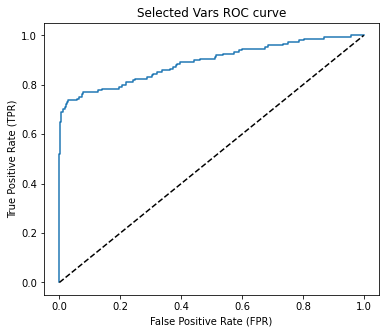

In [47]:
fpr, tpr, _ = roc_curve(y_test, test_probS)
fig, ax = plt.subplots(figsize = (6,5))
ax.plot(fpr, tpr)
ax.plot([0,1],[0,1],"k--")
ax.set(xlabel = "False Positive Rate (FPR)", ylabel = "True Positive Rate (TPR)", title = "Selected Vars ROC curve")
plt.show()

In [49]:
roc_auc_score(y_test, test_probS)

0.8912280896290743

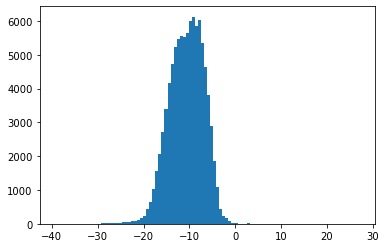

In [50]:
test_prob_logitS = logit(y_test_pred_probaS)
fig, ax = plt.subplots()
ax.hist(test_prob_logitS, bins = 100)
plt.show()

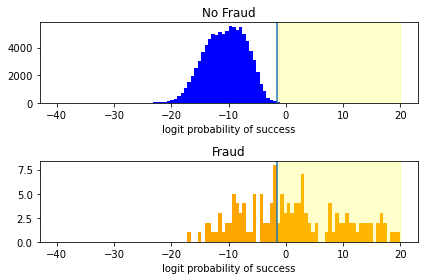

In [51]:
x_range = [-40, 20]
colors = ["blue","orange"]
titles = ["No Fraud", "Fraud"]
fig, axs = plt.subplots(nrows = 2)
for i, ax in enumerate(axs):
    ax.hist(test_prob_logitS[y_test == i],
        bins = 100,
        range = x_range,
        color = colors[i])
    ax.set(title = titles[i],
        xlabel = "logit probability of success")
    ax.axvline(-1.5)
    ax.axvspan(-1.5,x_range[1], alpha=0.2, color='yellow')
fig.tight_layout()

plt.show()

In [52]:
# intercept in model
log_regS.intercept_

array([-2.26135306])

In [53]:
# 18 coefficients for 18 variables
log_regS.coef_

array([[-8.50557731e-05,  5.94222493e-01, -7.66920528e-01,
        -7.37727210e-01,  1.24215834e-01, -1.48286531e-01,
        -5.76738475e-01, -5.51614046e-01, -3.47745174e-01,
        -3.23876901e-01,  6.98634006e-02, -4.55431247e-01,
        -9.32651831e-01, -6.19668464e-01, -3.20198107e-01,
        -4.88829436e-01,  8.31869284e-02,  4.12429860e-01,
         4.80293495e-01, -3.02499377e-03]])

In [55]:
#19 pvalues for 18 variables and intercept

logit_pvalue(log_regS, X_trainS)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.90113337e-03, 5.87627965e-04, 0.00000000e+00,
       0.00000000e+00, 2.13747943e-07, 1.50033519e-09, 2.58396735e-01,
       7.32747196e-15, 0.00000000e+00, 0.00000000e+00, 5.22196799e-08,
       0.00000000e+00, 1.94205046e-01, 0.00000000e+00, 7.36261919e-07,
       0.00000000e+00])